This notebook contains all plots relevant to the stellar mass-size relation and can be thought of as a compilation of results. Also contains some 
statistical information about the data being plotted to indicate where we are lacking a solid basis for results. The result plots included are as 
follows:

    1. Trendlines for all 3 transition types compared to quiescent and star-forming
    2. Field quiescent vs star-forming trend lines compared to van der Wel+14
    3. Isolated trendlines for cluster vs field quiescent and star-forming with uncertainties
    4. Isolated trendlines for cluster vs field in all 5 populations
    5. Ioslated trendlines for cluster vs field and literature comparison of difference as a function of redshift
    6. Trendlines for cluster vs field, quiescent cluster vs field, and star-forming cluster vs field
    7. Trendlines for spec vs phot catalog, elliptical vs spiral, quiescent vs star-forming (cluster only)
    8. Cluster galaxies for all 11 clusters in subplots


In [2]:
import warnings
import pandas as pd
import numpy as np
    
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Fast compile option: if the GOGREEN class has already been compiled and there has 
# been no change made to the catalog, uncomment the second line before running
priorCatalog = pd.DataFrame()
#priorCatalog = gg.catalog

with warnings.catch_warnings(): #suppressing depracation warnings for the import and instantion process for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)

    # Import
    %run "C:/Users/panda/Documents/Github/GOGREEN-Research/Code/GOGREEN.py"

    # Instantiate
    gg = GOGREEN( 'C:/Users/panda/Desktop/GOGREEN_Working/', priorCatalog=priorCatalog)
    
    #print(gg.catalog.columns.to_list())

In [3]:
# Establish criteria ( run before calling plot() )

searchCriteria = [
            'Star == 0',
            'K_flag < 4',
            'Mstellar > 10**9.8',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]
gg.standardCriteria = searchCriteria

Here we define our standard search criteria that all results in this notebook utilize.

In [4]:
gg.setGoodData(["member_adjusted == 1"], True) # Here we use a private method to set our definition of 
    # good data within the class to be the standard criteria plus membership as a quick and easy way to 
    # check some statistics. Note that this lasts only until the next call to any public method of the class.

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 128
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 5
starForming and postStarBurst: 1
passive: 239
passive and greenValley: 0
passive and blueQuiescent: 24
passive and postStarBurst: 15
greenValley: 53
greenValley and blueQuiescent: 8
greenValley and postStarBurst: 1
blueQuiescent: 37
blueQuiescent and postStarBurst: 7
postStarBurst: 17


These statistics are the counts of the number of member galaxies of all 5 populations related to SFR contained within our catalog after standard search criteria has been applied to it, as well as the crossovers of these populations.

In [4]:
gg.setGoodData(["nonmember_adjusted == 1"], True)  # Here we use a private method to set our definition of 
    # good data within the class to be the standard criteria plus non-membership as a quick and easy way to 
    # check some statistics. Note that this lasts only until the next call to any public method of the class.

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 106
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 9
starForming and postStarBurst: 1
passive: 66
passive and greenValley: 0
passive and blueQuiescent: 13
passive and postStarBurst: 6
greenValley: 20
greenValley and blueQuiescent: 3
greenValley and postStarBurst: 0
blueQuiescent: 25
blueQuiescent and postStarBurst: 3
postStarBurst: 7


These statistics are the counts of the number of non-member galaxies of all 5 populations related to SFR contained within our catalog after standard search criteria has been applied to it, as well as the crossovers of these populations.

Quiescent count: 239
Star Forming count: 128
Green Valley count: 53


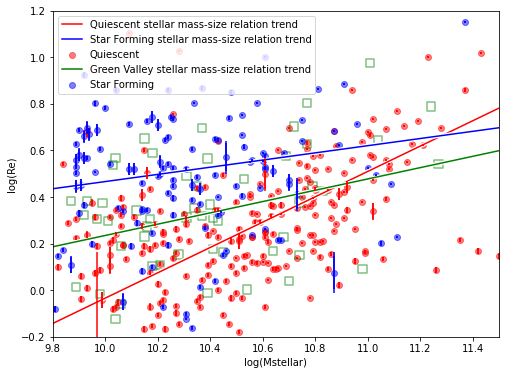

In [9]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.2,1.2], fitLine=True, bootstrap=False, plotErrBars=True, plotTransitionType='GV')

The stellar mass-size relation trends of quiescent, passive, and green valley members (with errors belonging to each galaxy)

Quiescent count: 239
Star Forming count: 128
Blue Quiescent count: 37


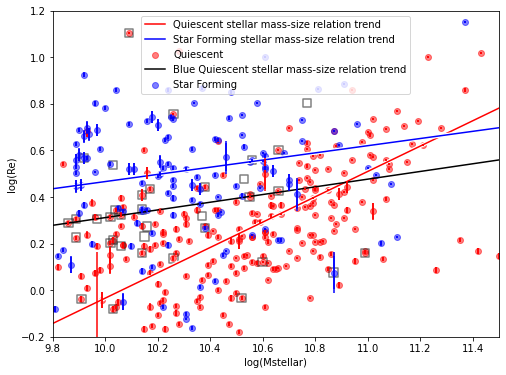

In [10]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.2,1.2], fitLine=True, bootstrap=False, plotErrBars=True, plotTransitionType='BQ')

The stellar mass-size relation trends of quiescent, passive, and blue quiescent members (with errors belonging to each galaxy)

Quiescent count: 239
Star Forming count: 128
Post-starburst count: 17


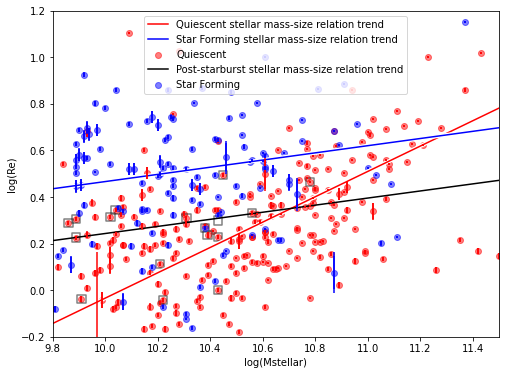

In [11]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.2,1.2], fitLine=True, bootstrap=False, plotErrBars=True, plotTransitionType='PSB')

The stellar mass-size relation trends of quiescent, passive, and post-starburst members (with errors belonging to each galaxy)

Quiescent count: 66
Star Forming count: 106


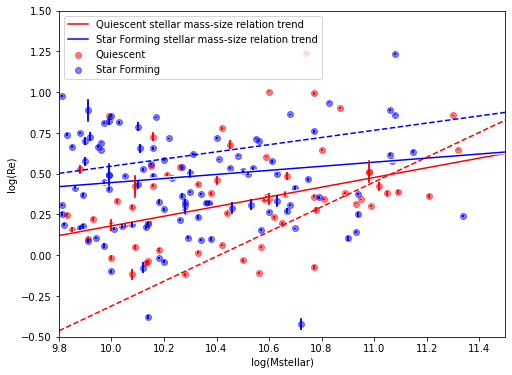

In [12]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='not', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

The stellar mass-size relation trends of quiescent and passive non-members with comparison to van der Wel+14 (and with errors belonging to each galaxy)

Quiescent cluster count: 239
Star-Forming cluster count: 128
Quiescent field count: 66
Star-Forming field count: 106
(0.7236260952194101, 1.069041820912672)


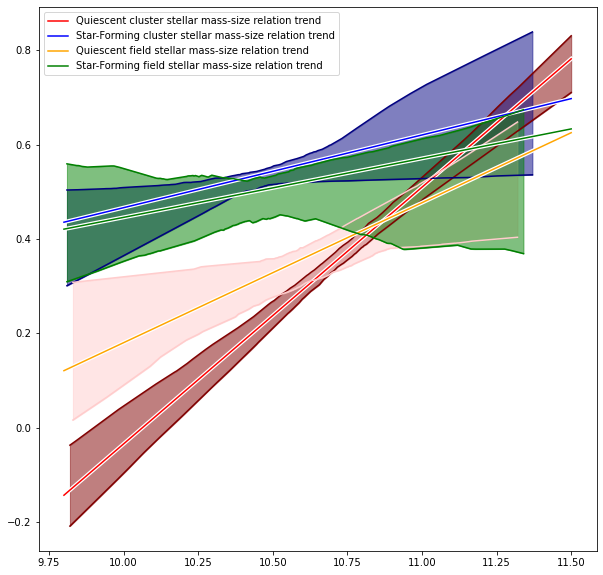

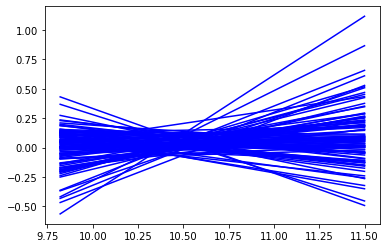

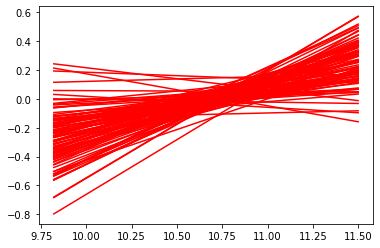

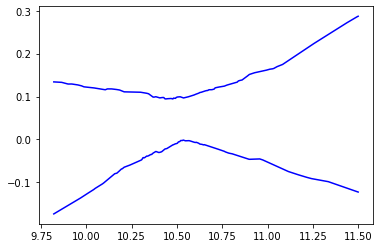

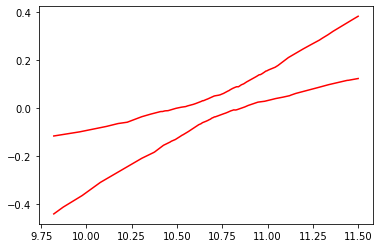

In [5]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    ratio = gg.compTrends(x=10.5)
    print(ratio) # first value is quiescent ratio, second is sf

Stellar mass-size relation trends with uncertainties for cluster vs field in quiescent and star-forming populations, ratio of these trends at log M*/Msun = 10.5, and analysis of uncertainties (bottom four plots are differences in bootstrap lines and confidence region of differences, respectively, as a function of mass).

Quiescent cluster count: 239
Star-Forming cluster count: 128
Quiescent field count: 66
Star-Forming field count: 106
GV cluster count: 53
GV field count: 20
BQ cluster count: 37
BQ field count: 25
PSB cluster count: 17
PSB field count: 7


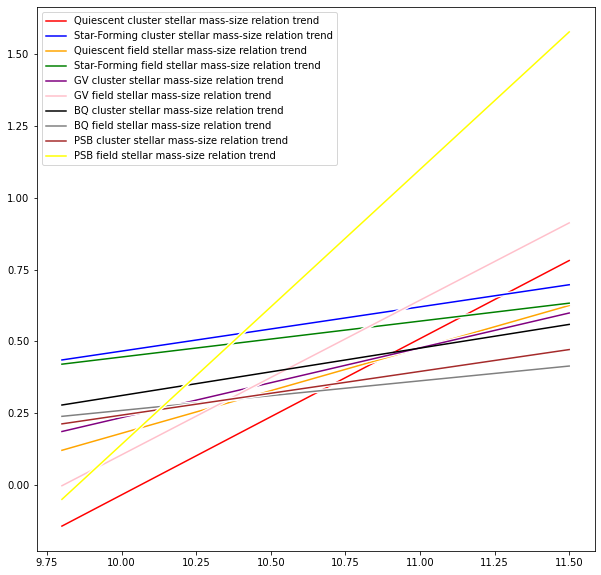

In [6]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.compTrends(x=10.5, plotType="transition", bootstrap=False)

Stellar mass-size relation trends with uncertainties for cluster vs field in quiescent, star-forming, green valley, blue quiescent, and post-starburst populations.

cluster count: 420
field count: 192
0.8399170248563219


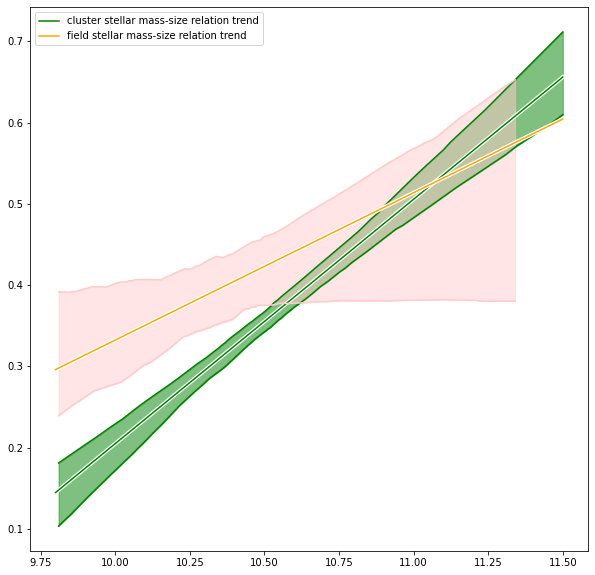

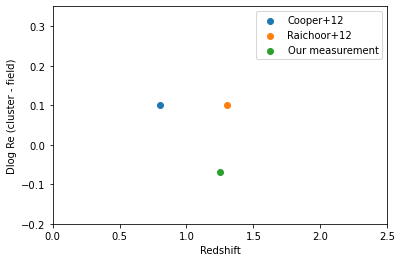

In [7]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    ratio = gg.compTrends(x=10.5, plotType="lit")
    print(ratio[0])

Stellar mass-size relation trends with uncertainties for cluster vs field in combined population, ratio of this trend at log M*/Msun = 10.5, and (WIP) comparison of results to other studies of the stellar mass-size relation

Cluster count: 420
Field count: 192


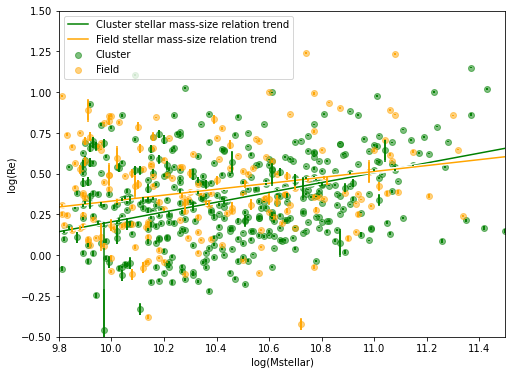

In [43]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useLog=[True,True], colorType='environment', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

Stellar mass-size relation trends for all members vs non-members (and with errors belonging to each galaxy)

Cluster (Quiescent) count: 239
Field (Quiescent) count: 66


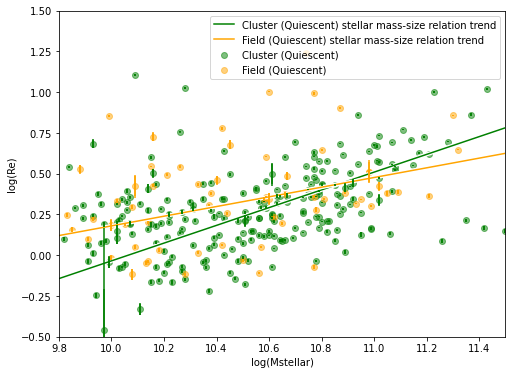

In [46]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useLog=[True,True], colorType='environmentQ', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

Stellar mass-size relation trends for quiescent members vs non-members (and with errors belonging to each galaxy)

Cluster (Star-forming) count: 128
Field (Star-forming) count: 106


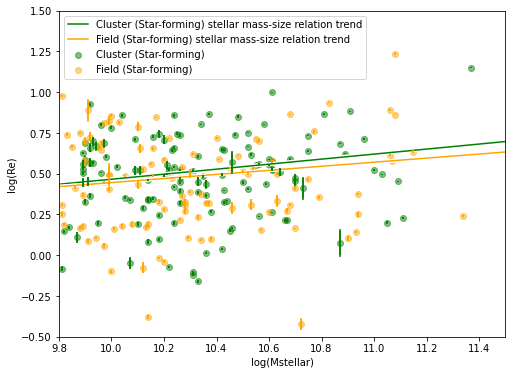

In [48]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useLog=[True,True], colorType='environmentSF', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

Stellar mass-size relation trends for star-forming members vs non-members (and with errors belonging to each galaxy)

Spectroscopic z count: 269
Photometric z count: 343


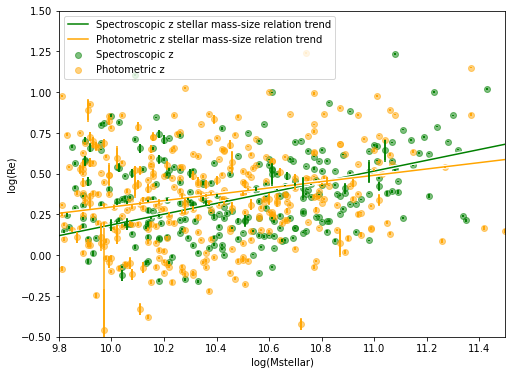

In [5]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useLog=[True,True], colorType='catalog', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

Stellar mass-size relation trends for spectroscopic vs photometric inclusions (and with errors belonging to each galaxy)

Elliptical count: 236
Spiral count: 376


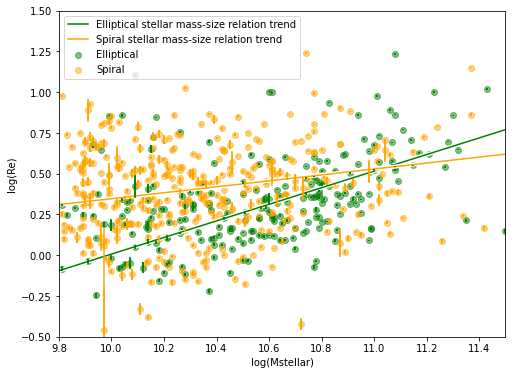

In [6]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useLog=[True,True], colorType='sersic', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

Stellar mass-size relation trends for 2.5 < n < 6 (elliptical) vs n <= 2.5 (spiral) galaxies (and with errors belonging to each galaxy)

Quiescent count: 305
Star Forming count: 234


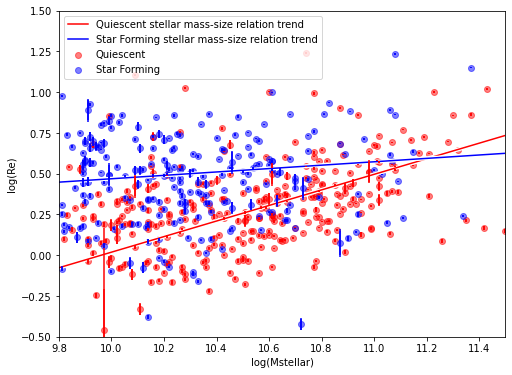

In [7]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

Stellar mass-size relation trends for quiescent vs star-forming galaxies (and with errors belonging to each galaxy)

<Figure size 576x432 with 0 Axes>

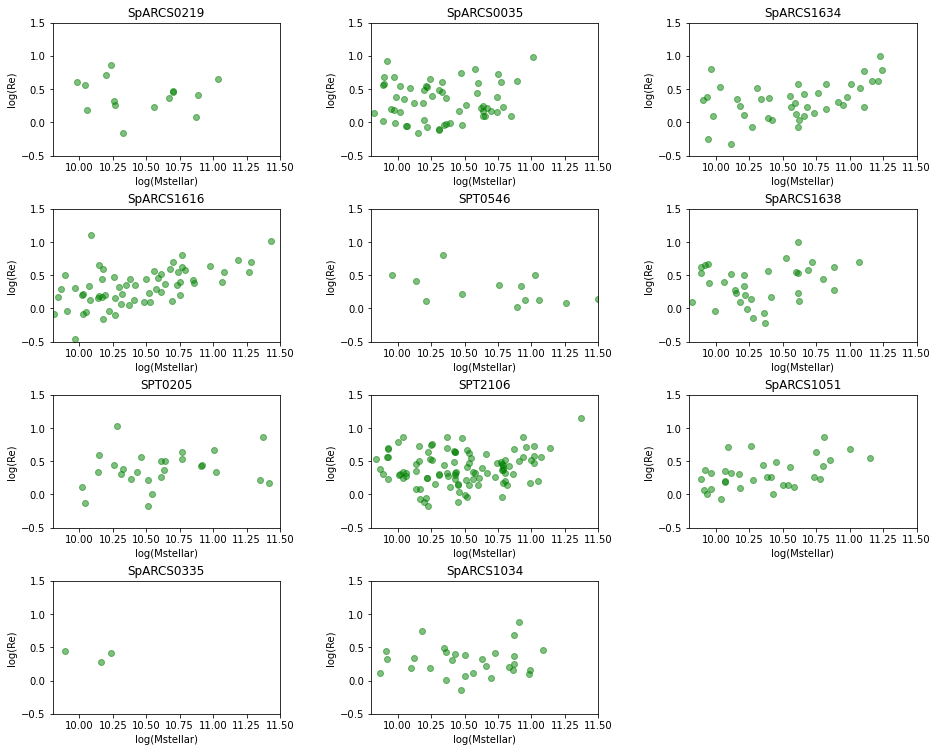

In [3]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 2, useMembers="only", useLog=[True,True], xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.5,1.5])

Member galaxies for each of the 11 GOGREEN clusters with structural parameters